In [1]:
import numpy as np
from scipy.stats import t
import matplotlib.pyplot as plt
from sqlalchemy import create_engine, MetaData, Table, inspect 
import pandas as pd 
import sqlite3
import math

In [2]:
engine = create_engine(f'mssql://LAPTOP-1T21SEOQ/AdventureWorks2022?trusted_connection=yes&driver=ODBC+Driver+17+for+SQL+Server')

In [3]:
connection=engine.connect()

In [4]:
pd.set_option('display.float_format', lambda x: '%.2f' % x) #ändra talformat

# 1.Försäljningsresultat för hela företaget


In [38]:
#Totalt försäljningsresultat i år jämfört med förra året

total_sales_company_sql="""
SELECT  
SUM(SalesYTD) AS 'Sales in the year to date',
SUM(SalesLastYear) AS 'Sales in last year'
FROM Sales.SalesTerritory
"""
total_sales_company_sql_df=pd.read_sql(sql=total_sales_company_sql,con=connection)
total_sales_company_sql_df.head()

,Sales in the year to date,Sales in last year
0,52751209.95,32715355.44


In [39]:
#Skapa en variabel för försäljningsvolym i hela företaget i år 

Sales_company_YTD = total_sales_company_sql_df.iloc[0,0]
Sales_company_YTD

52751209.9534

In [40]:
#Skapa en variabel för försäljningsvolym i hela företaget förra året 

Sales_company_last_year=total_sales_company_sql_df.iloc[0,1]
Sales_company_last_year

32715355.4353

In [41]:
# Beräkna försäljningstillväxt i hela företaget i absoluta och relativa värden

growth_sales_company= Sales_company_YTD - Sales_company_last_year
growth_sales_company_rounded=round(growth_sales_company, 2)

growth_sales_company_procent= (growth_sales_company/Sales_company_last_year)*100
growth_sales_company_procent_rounded = round(growth_sales_company_procent, 2)

print('Absolut ökning av försäljningsvolym i hela företaget i år jämfört med förra året, USD: ', growth_sales_company_rounded)
print('Relativ ökning av försäljningsvolym i hela företaget i år jämfört med förra året, %:', growth_sales_company_procent_rounded)

Absolut ökning av försäljningsvolym i hela företaget i år jämfört med förra året, USD:  20035854.52
Relativ ökning av försäljningsvolym i hela företaget i år jämfört med förra året, %: 61.24


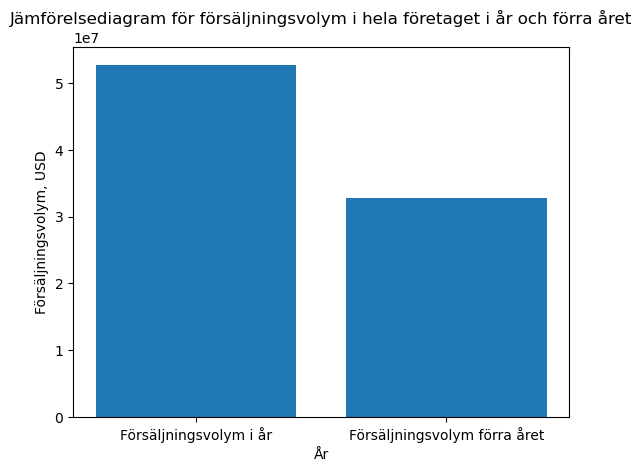

In [42]:
#Jämförelsediagram för försäljningsvolym i hela företaget i år och förra året

sales_data = {"Försäljningsvolym i år": Sales_company_YTD, "Försäljningsvolym förra året": Sales_company_last_year}

plt.bar(sales_data.keys(), sales_data.values())
plt.title("Jämförelsediagram för försäljningsvolym i hela företaget i år och förra året")
plt.xlabel("År")
plt.ylabel("Försäljningsvolym, USD")
plt.show()

In [43]:
#Totalt försäljningsresultat av anställda i år jämfört med förra året 

total_employee_sql="""
SELECT 
SUM(SalesYTD) AS 'SalesYTD', 
SUM(SalesLastYear) AS 'SalesLastYear'
FROM Sales.SalesPerson
"""
total_employee_sql_df=pd.read_sql(sql=total_employee_sql,con=connection)
total_employee_sql_df.head()

,SalesYTD,SalesLastYear
0,36277591.90,23685963.62


In [44]:
#Skapa en variabel för försäljningsvolym av anställda i år

Sales_employee_YTD = total_employee_sql_df.iloc[0,0]
Sales_employee_YTD

36277591.9034

In [45]:
#Skapa en variabel för försäljningsvolym av anställda förra året

Sales_employee_last_year = total_employee_sql_df.iloc[0,1]
Sales_employee_last_year

23685963.6244

In [46]:
# Beräkna försäljningstillväxt som gjorde anställda på absoluta och relativa värden

employee_sales=Sales_employee_YTD - Sales_employee_last_year
employee_sales_rounded = round(employee_sales, 2)

growth_employee_sales_procent= (employee_sales/Sales_employee_last_year)*100
growth_employee_sales_procent_rounded = round(growth_employee_sales_procent, 2)


print ('Absolut ökning av försäljningsvolym som gjorde anställda i år jämfört med förra året, USD: ', employee_sales_rounded)
print ('Relativ ökning av försäljningsvolym som gjorde anställda i år jämfört med förra året,%: ', growth_employee_sales_procent_rounded)

Absolut ökning av försäljningsvolym som gjorde anställda i år jämfört med förra året, USD:  12591628.28
Relativ ökning av försäljningsvolym som gjorde anställda i år jämfört med förra året,%:  53.16


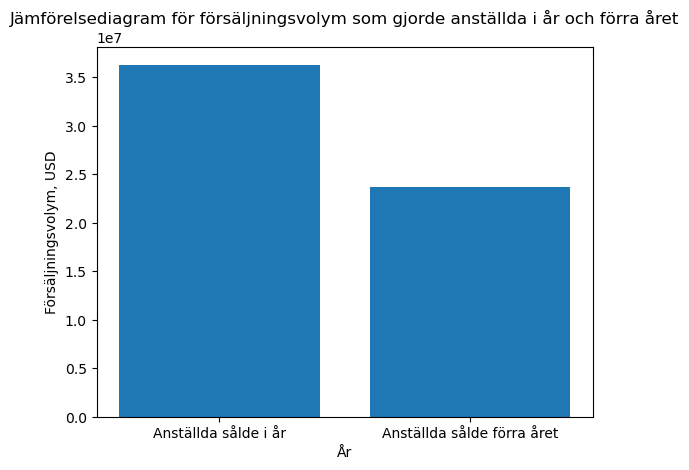

In [47]:
#Jämförelsediagram för försäljningsvolym som gjorde anställda i år och förra året

sales_data = {"Anställda sålde i år": Sales_employee_YTD, "Anställda sålde förra året": Sales_employee_last_year}

plt.bar(sales_data.keys(), sales_data.values())
plt.title("Jämförelsediagram för försäljningsvolym som gjorde anställda i år och förra året")
plt.xlabel("År")
plt.ylabel("Försäljningsvolym, USD")
plt.show()

In [48]:
# Beräkna Onlineförsäljningsvolym

#Onlineförsäljningsvolym i år
onlinesales_YTD=Sales_company_YTD-Sales_employee_YTD
onlinesales_YTD_rounded = round(onlinesales_YTD, 2)

print('Onlineförsäljningsvolym i år, USD: ', onlinesales_YTD_rounded)

#Onlineförsäljningsvolym förra året
onlinesales_last_year=Sales_company_last_year-Sales_employee_last_year
onlinesales_last_year_rounded = round(onlinesales_last_year, 2)
print('Onlineförsäljningsvolym förra året, UDS: ', onlinesales_last_year_rounded)

#Absolut ökning av onlineförsäljningsvolym i år jämfört med förra året
growth_onlinesales=onlinesales_YTD_rounded-onlinesales_last_year_rounded
print ('Absolut ökning av onlineförsäljningsvolym i år jämfört med förra året, USD: ', growth_onlinesales)

#Relativ ökning av onlineförsäljningsvolym i år jämfört med förra året
growth_onlinesales_procent=growth_onlinesales/onlinesales_last_year_rounded*100
growth_onlinesales_procent_rounded = round(growth_onlinesales_procent, 2)
print ('Relativ ökning av onlineförsäljningsvolym i år jämfört med förra året,%: ', growth_onlinesales_procent_rounded)



Onlineförsäljningsvolym i år, USD:  16473618.05
Onlineförsäljningsvolym förra året, UDS:  9029391.81
Absolut ökning av onlineförsäljningsvolym i år jämfört med förra året, USD:  7444226.24
Relativ ökning av onlineförsäljningsvolym i år jämfört med förra året,%:  82.44


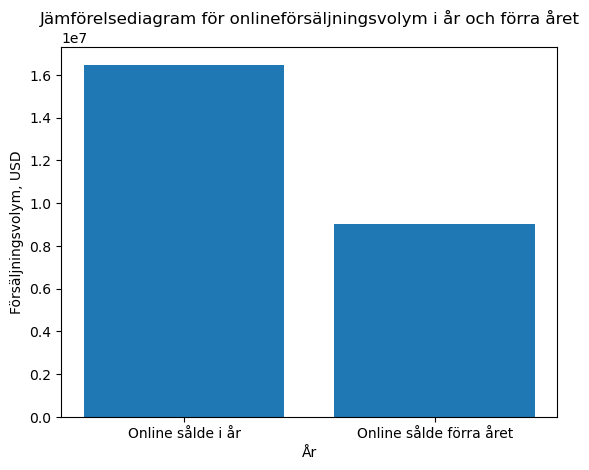

In [49]:
#Jämförelsediagram för onlineförsäljningsvolym i år och förra året

sales_data = {"Online sålde i år": onlinesales_YTD, "Online sålde förra året": onlinesales_last_year}

plt.bar(sales_data.keys(), sales_data.values())
plt.title("Jämförelsediagram för onlineförsäljningsvolym i år och förra året")
plt.xlabel("År")
plt.ylabel("Försäljningsvolym, USD")
plt.show()

In [50]:
# pivottabell "Försäljning av företaget som helhet, försäljning av anställda och onlineförsäljning"

sales_data = {
    "Företaget som helhet, USD": [Sales_company_YTD, Sales_company_last_year],
    "Anställda, USD": [Sales_employee_YTD, Sales_employee_last_year],
    "Online, USD": [onlinesales_YTD_rounded, onlinesales_last_year_rounded]
}

df = pd.DataFrame(sales_data, index=["I år", "Förra året"])
df["Andel av anställdas försäljning, %"] = (df["Anställda, USD"] / df["Företaget som helhet, USD"]) * 100
df["Andel av anställdas försäljning, %"] = df["Andel av anställdas försäljning, %"].round(2)
df["Andel av onlineförsäljning, %"] = (df[ "Online, USD"] / df["Företaget som helhet, USD"]) * 100
df["Andel av onlineförsäljning, %"] = df["Andel av onlineförsäljning, %"].round(2)

print(df)

            Företaget som helhet, USD  Anställda, USD  Online, USD  \
I år                      52751209.95     36277591.90  16473618.05   
Förra året                32715355.44     23685963.62   9029391.81   

            Andel av anställdas försäljning, %  Andel av onlineförsäljning, %  
I år                                     68.77                          31.23  
Förra året                               72.40                          27.60  


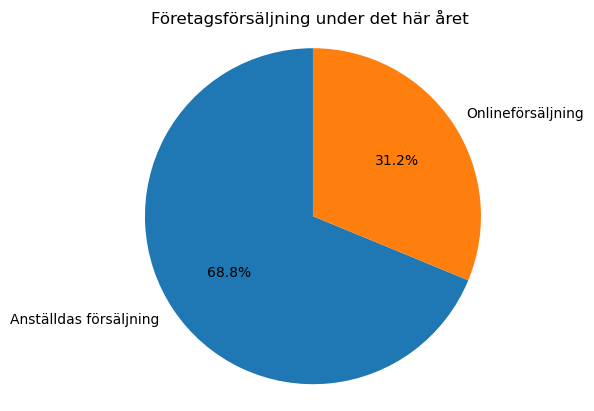

In [51]:
##cirkeldiagram: Andelar av anställdas försäljning och onlineförsäljning i hela företaget i år

labels = ['Anställdas försäljning', 'Onlineförsäljning']
sizes = [68.77, 31.23]

# Plot
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
ax.axis('equal')
plt.title('Företagsförsäljning under det här året ')

# Show plot
plt.show()

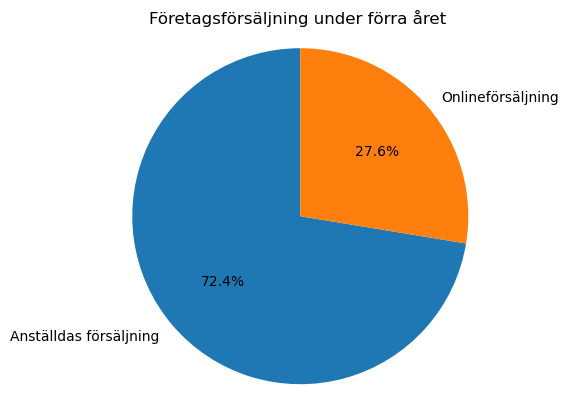

In [52]:
##cirkeldiagram: Andelar av anställdas försäljning och onlineförsäljning i hela företaget förra ået

labels = ['Anställdas försäljning', 'Onlineförsäljning']
sizes = [72.4,  27.60]


fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
ax.axis('equal')
plt.title('Företagsförsäljning under förra året ')


plt.show()

# 2. Försäljningsresultat i regioner 

In [53]:
#Försäljningsresultat per region med tilldelat antal kunder

sales_by_region_customer_sql = """
SELECT A.TerritoryID,
       A.Name, 
       A.CountryRegionCode, 
       A.SalesYTD, 
	   A.SalesLastYear,
	   ChangeYTD= SalesYTD- SalesLastYear, 
	   ChangeYTD_procent=((SalesYTD- SalesLastYear)*100)/SalesLastYear,
	   B.NumberOfCustomer
FROM Sales.SalesTerritory AS A
LEFT JOIN(
SELECT TerritoryID,
COUNT(CustomerID) AS NumberOfCustomer
FROM Sales.Customer 
GROUP BY TerritoryID)AS B ON A. TerritoryID=B.TerritoryID
ORDER BY NumberOfCustomer


""" 
sales_by_region_customer_sql_df=pd.read_sql(sql=sales_by_region_customer_sql,con=connection)
sales_by_region_customer_sql_df.head(10)


,TerritoryID,Name,CountryRegionCode,SalesYTD,SalesLastYear,ChangeYTD,ChangeYTD_procent,NumberOfCustomer
0,2,Northeast,US,2402176.85,3607148.94,-1204972.09,-33.41,113
1,3,Central,US,3072175.12,3205014.08,-132838.96,-4.14,132
2,5,Southeast,US,2538667.25,3925071.43,-1386404.18,-35.32,176
3,6,Canada,CA,6771829.14,5693988.86,1077840.28,18.93,1791
4,8,Germany,DE,3805202.35,1307949.79,2497252.56,190.93,1852
5,7,France,FR,4772398.31,2396539.76,2375858.55,99.14,1884
6,10,United Kingdom,GB,5012905.37,1635823.40,3377081.97,206.45,1991
7,1,Northwest,US,7887186.79,3298694.49,4588492.29,139.10,3520
8,9,Australia,AU,5977814.92,2278548.98,3699265.94,162.35,3665
9,4,Southwest,US,10510853.87,5366575.71,5144278.16,95.86,4696


In [54]:
#  Genomsnittliga resultat per region

sales_by_region_customer_sql_df = pd.read_sql(sql=sales_by_region_customer_sql, con=connection)


average_SalesLastYear = sales_by_region_customer_sql_df['SalesLastYear'].mean()
average_SalesLastYear_rounded = round(average_SalesLastYear, 2)
print('Genomsnittlig försäljningsvolym per region förra året, USD: ', average_SalesLastYear_rounded)

sales_by_region_customer_sql_df=pd.read_sql(sql=sales_by_region_customer_sql,con=connection)
average_SalesYTD = sales_by_region_customer_sql_df['SalesYTD'].mean()
average_SalesYTD_rounded = round(average_SalesYTD, 2)
print ('Genomsnittlig försäljningsvolym per region i det här året, USD: ', average_SalesYTD_rounded)

sales_by_region_customer_sql_df=pd.read_sql(sql=sales_by_region_customer_sql,con=connection)
average_NumberOfCustomer = sales_by_region_customer_sql_df['NumberOfCustomer'].mean()
average_NumberOfCustomer_rounded = round(average_NumberOfCustomer, 1)
print('Genomsnittligt antal kunder per region, stycken: ', average_NumberOfCustomer_rounded)



average_ChangeYTD = sales_by_region_customer_sql_df['ChangeYTD'].mean()
average_ChangeYTD_rounded = round(average_SalesGrowthYTD, 2)
print('Genomsnittlig försäljningsökning i år jämfört med förra året, USD: ', average_ChangeYTD_rounded)


sales_by_region_customer_sql_df=pd.read_sql(sql=sales_by_region_customer_sql,con=connection)
average_ChangeYTD_procent = sales_by_region_customer_sql_df['ChangeYTD_procent'].mean()
average_ChangeYTD_procent_rounded = round(average_ChangeYTD_procent, 2)
print('Genomsnittlig försäljningsökning i år jämfört med förra året, %: ', average_ChangeYTD_procent_rounded)


Genomsnittlig försäljningsvolym per region förra året, USD:  3271535.54
Genomsnittlig försäljningsvolym per region i det här året, USD:  5275121.0
Genomsnittligt antal kunder per region, stycken:  1982.0


NameError: name 'average_SalesGrowthYTD' is not defined

In [55]:
#Klargörandet för region 2 och 3

sales_comparison_sql = """
SELECT A.TerritoryID,
       A.Name, 
       A.SalesYTD AS SalesRegYTD, 
	   B.SalesPersonYTD,
	   OnlinesalesYTD=SalesYTD-SalesPersonYTD
FROM Sales.SalesTerritory AS A
LEFT JOIN(
SELECT TerritoryID, 
       SUM(SalesYTD) AS SalesPersonYTD 
FROM Sales.SalesPerson
WHERE TerritoryID IS NOT NULL
GROUP BY TerritoryID) AS B 
ON A.TerritoryID=B.TerritoryID
WHERE A.TerritoryID IN (2, 3)

"""
result = pd.read_sql(sales_comparison_sql,engine)
result

,TerritoryID,Name,SalesRegYTD,SalesPersonYTD,OnlinesalesYTD
0,2,Northeast,2402176.85,3763178.18,-1361001.33
1,3,Central,3072175.12,3189418.37,-117243.25


In [56]:
#möjlig förklaring till det negativa talet av onlineförsäljning i regioner ID=2 och ID=3

eploees_2_3=""" SELECT*
FROM Sales.SalesTerritoryHistory
WHERE BusinessEntityID=275 OR BusinessEntityID=277 OR BusinessEntityID=27
ORDER BY BusinessEntityID """
result=pd.read_sql(eploees_2_3, engine)
result

,BusinessEntityID,TerritoryID,StartDate,EndDate,rowguid,ModifiedDate
0,275,2,2011-05-31,2012-11-29,8563CE6A-00FF-47D7-BA4D-3C3E1CDEF531,2012-11-22
1,275,3,2012-11-30,NaT,2F44304C-EE87-4C72-813E-CA75C5F61F4C,2012-11-23
2,277,3,2011-05-31,2012-11-29,3E9F893D-5142-46C9-A76A-867D1E3D6F90,2012-11-22
3,277,2,2012-11-30,NaT,132E4721-32DD-4A73-B556-1837F3A2B9AE,2012-11-23


In [57]:
#Sammanfattningstabell per region

sales_comparison_sql = """
SELECT A.TerritoryID,
       A.Name, 
       A.SalesYTD AS SalesRegYTD, 
	   B.SalesPersonYTD,
	   Online_salesYTD=SalesYTD-SalesPersonYTD,
	   A.SalesLastYear AS SalesRegLY,
	   B.SalesPersonLY,
	   Online_salesLY=SalesLastYear-SalesPersonLY,
	   ChangeReg=SalesYTD-SalesLastYear,
	   ChangePerson=SalesPersonYTD-SalesPersonLY,
	   ChangeOnline=SalesYTD-SalesPersonYTD

FROM Sales.SalesTerritory AS A
LEFT JOIN(
SELECT TerritoryID, 
       SUM(SalesYTD) AS SalesPersonYTD, 
	   SUM(SalesLastYear) AS SalesPersonLY
FROM Sales.SalesPerson
WHERE TerritoryID is NOT NULL
GROUP BY TerritoryID) AS B 
ON A.TerritoryID=B.TerritoryID
WHERE A.TerritoryID IN (1, 4,5,6,7,8,9,10)
ORDER BY ChangeOnline

"""
result = pd.read_sql(sales_comparison_sql,engine)
result

,TerritoryID,Name,SalesRegYTD,SalesPersonYTD,Online_salesYTD,SalesRegLY,SalesPersonLY,Online_salesLY,ChangeReg,ChangePerson,ChangeOnline
0,5,Southeast,2538667.25,2315185.61,223481.64,3925071.43,1849640.94,2075430.49,-1386404.18,465544.67,223481.64
1,10,United Kingdom,5012905.37,4116871.23,896034.14,1635823.40,1635823.40,0.00,3377081.97,2481047.83,896034.14
2,7,France,4772398.31,3121616.32,1650781.99,2396539.76,2396539.76,0.00,2375858.55,725076.56,1650781.99
3,8,Germany,3805202.35,1827066.71,1978135.64,1307949.79,1307949.79,0.00,2497252.56,519116.92,1978135.64
4,6,Canada,6771829.14,4058260.18,2713568.96,5693988.86,3658511.55,2035477.31,1077840.28,399748.63,2713568.96
5,1,Northwest,7887186.79,4502152.27,3385034.52,3298694.49,3298694.49,0.00,4588492.29,1203457.77,3385034.52
6,4,Southwest,10510853.87,6709904.17,3800949.71,5366575.71,3512662.03,1853913.68,5144278.16,3197242.14,3800949.71
7,9,Australia,5977814.92,1421810.92,4556003.99,2278548.98,2278548.98,0.00,3699265.94,-856738.05,4556003.99


# 3. Försäljningsresultat av anställda på försäljningsavdelningen

In [58]:
#Alla anställda på försäljningsavdelningen

emploees_sales_department_sql="""
SELECT A.BusinessEntityID
	     , B. DepartmentID
		 , B.Name
	   , A.StartDate
	   , A.EndDate
	  FROM HumanResources.EmployeeDepartmentHistory AS A
	  LEFT JOIN(
	  SELECT DepartmentID, Name
	  FROM HumanResources.Department 
	  WHERE DepartmentID=3)
	  AS B ON A.DepartmentID=B.DepartmentID
	  WHERE Name IS NOT NULL
	  ORDER BY Name
"""
result=pd.read_sql(emploees_sales_department_sql, engine)
result

,BusinessEntityID,DepartmentID,Name,StartDate,EndDate
0,273,3,Sales,2011-02-15,None
1,274,3,Sales,2011-01-04,None
2,275,3,Sales,2011-05-31,None
3,276,3,Sales,2011-05-31,None
4,277,3,Sales,2011-05-31,None
5,278,3,Sales,2011-05-31,None
6,279,3,Sales,2011-05-31,None
7,280,3,Sales,2011-05-31,None
8,281,3,Sales,2011-05-31,None
9,282,3,Sales,2011-05-31,None


In [59]:
#försäljning av alla anställda

sales_empoees_sql="""
SELECT BusinessEntityID,
	  TerritoryID,
	  SalesYTD,
	  SalesLastYear
	  
	  FROM Sales.SalesPerson
"""
result = pd.read_sql(sales_empoees_sql,engine)
result

,BusinessEntityID,TerritoryID,SalesYTD,SalesLastYear
0,274,NaN,559697.56,0.00
1,275,2.00,3763178.18,1750406.48
2,276,4.00,4251368.55,1439156.03
3,277,3.00,3189418.37,1997186.20
4,278,6.00,1453719.47,1620276.90
5,279,5.00,2315185.61,1849640.94
6,280,1.00,1352577.13,1927059.18
7,281,4.00,2458535.62,2073506.00
8,282,6.00,2604540.72,2038234.65
9,283,1.00,1573012.94,1371635.32


In [60]:
#Försäljning av anställda utan region

sales_empoyees_not_region_sql="""
SELECT A.BusinessEntityID,
	        A.JobTitle,
	        B.TerritoryID,
            B. SalesYTD,
	        B. SalesLastYear 

FROM HumanResources.Employee AS A
INNER JOIN Sales.SalesPerson AS B 
ON A.BusinessEntityID=B.BusinessEntityID
WHERE TerritoryID IS NULL
"""
sales_empoyees_not_region_sql_df=pd.read_sql(sql=sales_empoyees_not_region_sql,con=connection)
sales_empoyees_not_region_sql_df.head()

,BusinessEntityID,JobTitle,TerritoryID,SalesYTD,SalesLastYear
0,274,North American Sales Manager,None,559697.56,0.00
1,285,Pacific Sales Manager,None,172524.45,0.00
2,287,European Sales Manager,None,519905.93,0.00


In [61]:
#försäljingsvolym som gjorde managers i år

sum_sales_ytd_not_region = sales_empoyees_not_region_sql_df['SalesYTD'].sum()

sum_sales_ytd_not_region_round = round(sum_sales_ytd_not_region, 2)
print('sales amount of managers this year: ', sum_sales_ytd_not_region_round)

sales amount of managers this year:  1252127.95


In [62]:
#Försäljning av anställda i regionen

sales_empoyees_region_sql="""

SELECT  A.TerritoryID,
        A.Name,
        B.BusinessEntityID,
        B.SalesYTD,
        B.SalesLastYear,
		B.SalesGrowthYTD
FROM Sales.SalesTerritory AS A
LEFT JOIN(SELECT TerritoryID,
                 BusinessEntityID,
                 SalesYTD,
                 SalesLastYear,
		         SalesGrowthYTD=SalesYTD-SalesLastYear
FROM Sales.SalesPerson ) AS B
ON A.TerritoryID=B.TerritoryID
ORDER BY TerritoryID 

"""

sales_empoyees_region_sql_df=pd.read_sql(sql=sales_empoyees_region_sql,con=connection)
sales_empoyees_region_sql_df.head(20)


,TerritoryID,Name,BusinessEntityID,SalesYTD,SalesLastYear,SalesGrowthYTD
0,1,Northwest,280,1352577.13,1927059.18,-574482.05
1,1,Northwest,283,1573012.94,1371635.32,201377.62
2,1,Northwest,284,1576562.20,0.00,1576562.20
3,2,Northeast,275,3763178.18,1750406.48,2012771.70
4,3,Central,277,3189418.37,1997186.20,1192232.16
5,4,Southwest,276,4251368.55,1439156.03,2812212.52
6,4,Southwest,281,2458535.62,2073506.00,385029.62
7,5,Southeast,279,2315185.61,1849640.94,465544.67
8,6,Canada,278,1453719.47,1620276.90,-166557.43
9,6,Canada,282,2604540.72,2038234.65,566306.06


In [63]:
#Anställda med negativ försäljningstillväxt

empoyees_outflow_by_sales_sql="""
SELECT  A.TerritoryID,
        A.Name,
        B.BusinessEntityID,
        B.SalesYTD,
        B.SalesLastYear,
		B.SalesGrowthYTD
FROM Sales.SalesTerritory AS A
LEFT JOIN(SELECT TerritoryID,
                 BusinessEntityID,
                 SalesYTD,
                 SalesLastYear,
		         SalesGrowthYTD=SalesYTD-SalesLastYear
FROM Sales.SalesPerson ) AS B
ON A.TerritoryID=B.TerritoryID
WHERE SalesGrowthYTD<0
ORDER BY SalesGrowthYTD DESC 
"""
result = pd.read_sql(empoyees_outflow_by_sales_sql,engine)
result

,TerritoryID,Name,BusinessEntityID,SalesYTD,SalesLastYear,SalesGrowthYTD
0,6,Canada,278,1453719.47,1620276.90,-166557.43
1,1,Northwest,280,1352577.13,1927059.18,-574482.05
2,9,Australia,286,1421810.92,2278548.98,-856738.05


# 4. Konfidensintervall

In [64]:
#beräkna det totala orderbeloppet för varje kund

average_order_per_coustemer_konf_inter="""  
SELECT 
CustomerID, 
SUM(SubTotal) AS SaleAmount

FROM Sales.SalesOrderHeader
GROUP BY CustomerID
"""
average_order_per_coustemer_konf_inter_df = pd.read_sql(sql=average_order_per_coustemer_konf_inter, con=connection)
average_order_per_coustemer_konf_inter_df.head()

,CustomerID,SaleAmount
0,14324,5121.43
1,22814,4.99
2,11407,53.99
3,28387,583.97
4,19897,596.96


In [65]:
#faktisk medelvärdet orderbeloppet per kund

average_order_per_coustemer_konf_inter_df = pd.read_sql(sql=average_order_per_coustemer_konf_inter, con=connection)

average_SaleAmount = average_order_per_coustemer_konf_inter_df['SaleAmount'].mean()
average_SaleAmount_rounded = round(average_SaleAmount, 2)

print('The average sales amount per 1 coustemer: ', average_SaleAmount_rounded)

The average sales amount per 1 coustemer:  5745.4


In [66]:
#30 slumpmässigt utvalda kunder

sales_per_coustemer_30_konf_inter="""  
SELECT TOP(30)
CustomerID, 
SUM(SubTotal) AS Amount

FROM Sales.SalesOrderHeader
GROUP BY CustomerID
ORDER BY NEWID()
"""
sales_per_coustemer_30_konf_inter_df = pd.read_sql(sql=sales_per_coustemer_30_konf_inter, con=connection)
sales_per_coustemer_30_konf_inter_df.head()

,CustomerID,Amount
0,27410,23.78
1,25737,1764.96
2,19873,7.28
3,16339,3169.59
4,20523,14.98


In [67]:
# medelvärdet orderbeloppet per kund för slumpmässigt utvalda 30 kunder och varians

average_amount_30 = sales_per_coustemer_30_konf_inter_df['Amount'].mean()
average_amount_30_rounded = round(average_amount_30, 2)
varians_kvadrat_30 = (1/(30-1))*(((sales_per_coustemer_30_konf_inter_df['Amount'] - average_amount_30) ** 2).sum())
varians_kvadrat_30_rounded = round(varians_kvadrat_30, 2)


print('average_amount', average_amount_30_rounded)
print('varians_kvadrat', varians_kvadrat_30_rounded)

average_amount 1313.24
varians_kvadrat 3139482.35


In [68]:
# Konfidensintervall för medelvärdet orderbeloppet per kund för slumpmässigt utvalda 30 kunder

#Tabller 4 (t-fördelning)
#Frihetsgrader=29
#t(p=95%)=2,045
a = 2.045 * math.sqrt(varians_kvadrat_30/30)
a_rounded = round(a, 2)
print('Konfidensintervall of ordersummor 30 slumpmässigt utvalda kunder: ', average_amount_30_rounded, '+ -', a_rounded)

Konfidensintervall of ordersummor 30 slumpmässigt utvalda kunder:  1313.24 + - 661.55


In [69]:
#1000 slumpmässigt utvalda kunder

sales_per_coustemer_1000_konf_inter="""  
SELECT TOP(1000)
CustomerID, 
SUM(SubTotal) AS Amount

FROM Sales.SalesOrderHeader
GROUP BY CustomerID
ORDER BY NEWID()
"""
sales_per_coustemer_1000_konf_inter_df = pd.read_sql(sql=sales_per_coustemer_1000_konf_inter, con=connection)
sales_per_coustemer_1000_konf_inter_df.head()

,CustomerID,Amount
0,27363,132.97
1,27950,4.99
2,16620,5895.24
3,26201,4498.46
4,20670,3228.57


In [70]:
# medelvärdet orderbeloppet per kund för slumpmässigt utvalda 1000 kunder och varians

average_amount_1000 = sales_per_coustemer_1000_konf_inter_df['Amount'].mean()
average_amount_1000_rounded = round(average_amount_1000, 2)
varians_kvadrat_1000 = (1/(1000-1))*(((sales_per_coustemer_1000_konf_inter_df['Amount'] - average_amount_1000) ** 2).sum())
varians_kvadrat_1000_rounded = round(varians_kvadrat_1000, 2)


print('average_amount', average_amount_1000_rounded)
print('varians_kvadrat', varians_kvadrat_1000_rounded)

average_amount 7624.97
varians_kvadrat 2948223442.67


In [71]:
# Konfidensintervall för medelvärdet orderbeloppet per kund för slumpmässigt utvalda 1000 kunder

#Tabller 3b (Normalfördelningen)
#Frihetsgrader=150
#z(p=95%)=1,96
b = 1.96 * math.sqrt(varians_kvadrat_1000/1000)
b_rounded = round(b, 2)
print('Konfidensintervall of ordersummor 1000 slumpmässigt utvalda kunder: ', average_amount_1000_rounded, '+ -', b_rounded)

Konfidensintervall of ordersummor 1000 slumpmässigt utvalda kunder:  7624.97 + - 3365.4
